**BIOS512 Final**

**Men's Tennis Grand Slam Data**

In [6]:
library(tidyverse)
library(cluster)
library(factoextra)
theme_set(theme_minimal(base_size = 16))
df <- read_csv("Mens_Tennis_Grand_Slam_Winner.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.1
✔ readr     2.1.6     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Rows: 292 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): TOURNAMENT, WINNER, RUNNER-UP, WINNER_NATIONALITY, WINNER_LEFT_OR_R...
dbl (4): YEAR, WINNER_ATP_RANKING, RUNNER-UP_ATP_RANKING, WINNER_PRIZE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


*Codebook*

In [7]:
library(tibble)

codebook <- tibble(
  column = c(
    "YEAR",
    "TOURNAMENT",
    "WINNER",
    "RUNNER-UP",
    "WINNER_NATIONALITY",
    "WINNER_ATP_RANKING",
    "RUNNER-UP_ATP_RANKING",
    "WINNER_LEFT_OR_RIGHT_HANDED",
    "TOURNAMENT_SURFACE",
    "WINNER_PRIZE"
  ),
  description = c(
    "Year of the tournament",
    "Tournament name (Grand Slam)",
    "Winner name",
    "Runner-up name",
    "Winner nationality",
    "Winner ATP ranking entering the tournament",
    "Runner-up ATP ranking entering the tournament",
    "Winner playing hand (left or right handed)",
    "Court surface type",
    "Winner prize money"
  )
)

codebook


column,description
<chr>,<chr>
YEAR,Year of the tournament
TOURNAMENT,Tournament name (Grand Slam)
WINNER,Winner name
RUNNER-UP,Runner-up name
WINNER_NATIONALITY,Winner nationality
WINNER_ATP_RANKING,Winner ATP ranking entering the tournament
RUNNER-UP_ATP_RANKING,Runner-up ATP ranking entering the tournament
WINNER_LEFT_OR_RIGHT_HANDED,Winner playing hand (left or right handed)
TOURNAMENT_SURFACE,Court surface type


**Question 1: How do the rankings of the winners compare to the rankings of the runner ups?**

Warning message:
“Removed 229 rows containing missing values or values outside the scale range
(`geom_point()`).”



Call:
glm(formula = win_top2 ~ `RUNNER-UP_ATP_RANKING`, family = binomial(), 
    data = model_df)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)               1.3177     0.5312    2.48   0.0131 *
`RUNNER-UP_ATP_RANKING`  -0.0181     0.1206   -0.15   0.8807  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.743  on 62  degrees of freedom
Residual deviance: 66.721  on 61  degrees of freedom
  (229 observations deleted due to missingness)
AIC: 70.721

Number of Fisher Scoring iterations: 4


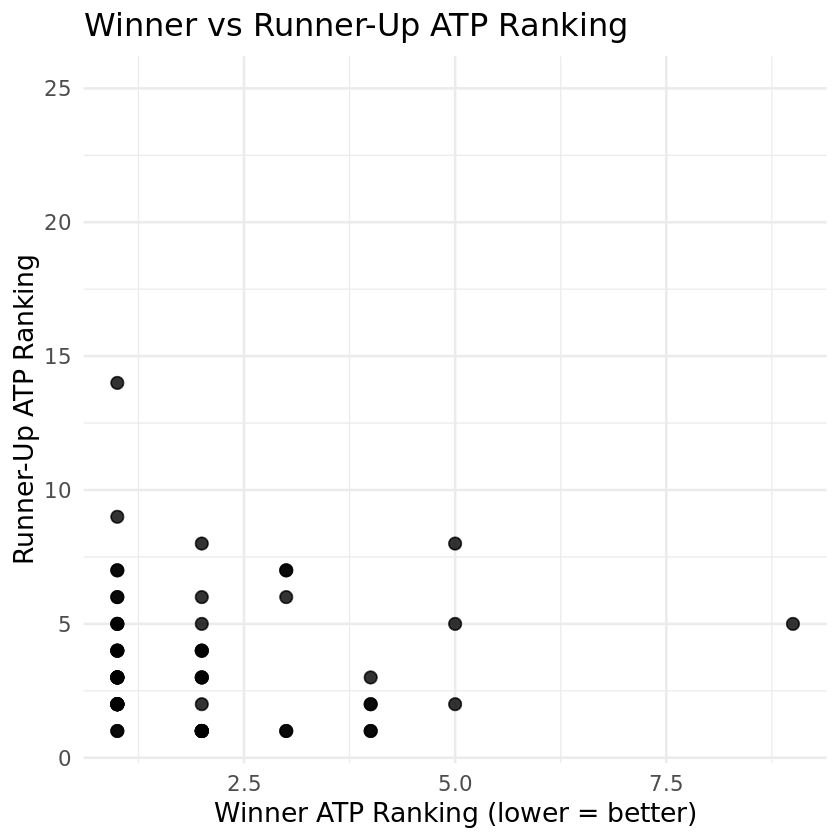

In [8]:
df %>%
  ggplot(aes(x = WINNER_ATP_RANKING, y = `RUNNER-UP_ATP_RANKING`)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "Winner vs Runner-Up ATP Ranking",
    x = "Winner ATP Ranking (lower = better)",
    y = "Runner-Up ATP Ranking"
  )

model_df <- df %>%
  mutate(win_top2 = if_else(WINNER_ATP_RANKING <= 2, 1, 0))

mod <- glm(win_top2 ~ `RUNNER-UP_ATP_RANKING`,
           data = model_df,
           family = binomial())
summary(mod)

This data set only contains rankings from 2007 onwards. Therefore, analyzing by ATP ranking does not feel particularily insightful if wanting to analyze the whole dataset. However, this plot does show that since 2007, higher ranked players tend to reach the final of a grand slam. This indicates some homogenous outcomes in this dataset. 

**Question 2: Can we identify natural groupings of matches based on rankings and prize money?**

K-means clustering with 3 clusters of sizes 13, 37, 13

Cluster means:
  WINNER_ATP_RANKING RUNNER-UP_ATP_RANKING WINNER_PRIZE
1          0.5360719            -0.1924349    1.5332093
2         -0.2290659            -0.4515534   -0.4924817
3          0.1158849             1.4776252   -0.1315307

Clustering vector:
 [1] 2 3 3 1 2 3 2 2 2 3 1 1 2 2 1 1 3 3 1 3 3 3 1 1 2 2 1 1 2 2 1 1 2 2 1 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 3 2 2 2 3

Within cluster sum of squares by cluster:
[1] 40.34092 34.48431 29.15497
 (between_SS / total_SS =  44.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

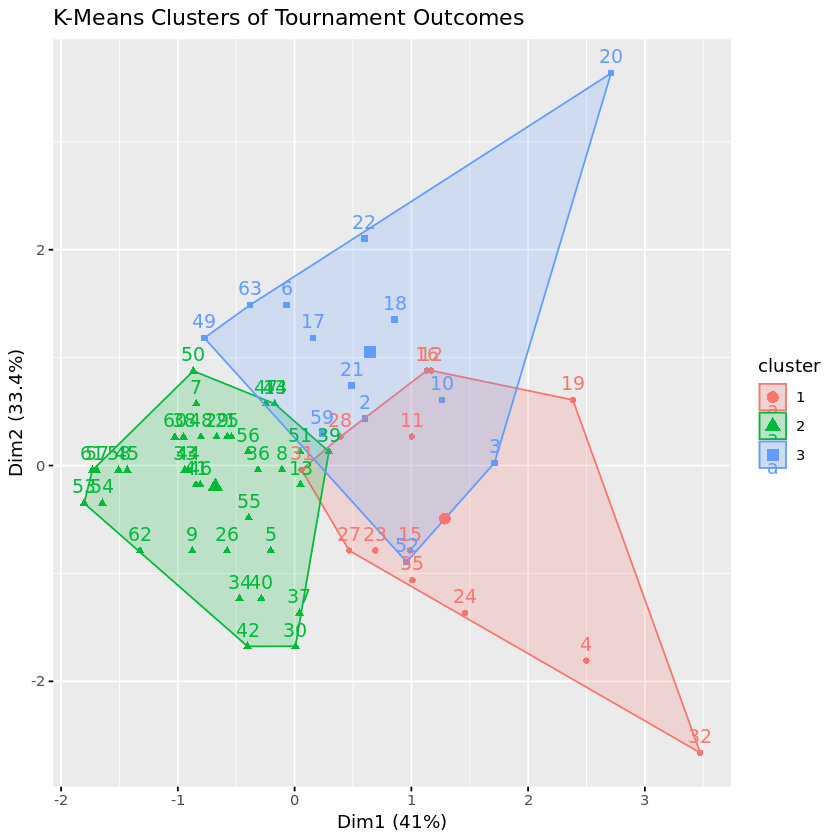

In [9]:
clust_df <- df %>%
  select(WINNER_ATP_RANKING, `RUNNER-UP_ATP_RANKING`, WINNER_PRIZE) %>%
  drop_na() %>%
  scale()

set.seed(1)
km <- kmeans(clust_df, centers = 3, nstart = 25)
km

fviz_cluster(km, data = clust_df,
             main = "K-Means Clusters of Tournament Outcomes")
     

Since this only includes Grandslams  and ranked winners (2007-2023):
Cluster 1 shows more dominant winners (weaker or moderate runner up) → common in the big 3 era with Djokovic, Nadal, and Federer.
Cluster 2 shows strong winners and strong runner-ups (very common because of the nature of grand slams).
Cluster 3 shows more surprising finalists and potential upset. This cluster seems less common and as since 2007 slams have been dominated by top ranked players in both the winners and runnerups. 


**Question 3: What are the main directions of variation in the tournament data?**

Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.1096 1.0010 0.8757
Proportion of Variance 0.4104 0.3340 0.2556
Cumulative Proportion  0.4104 0.7444 1.0000

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


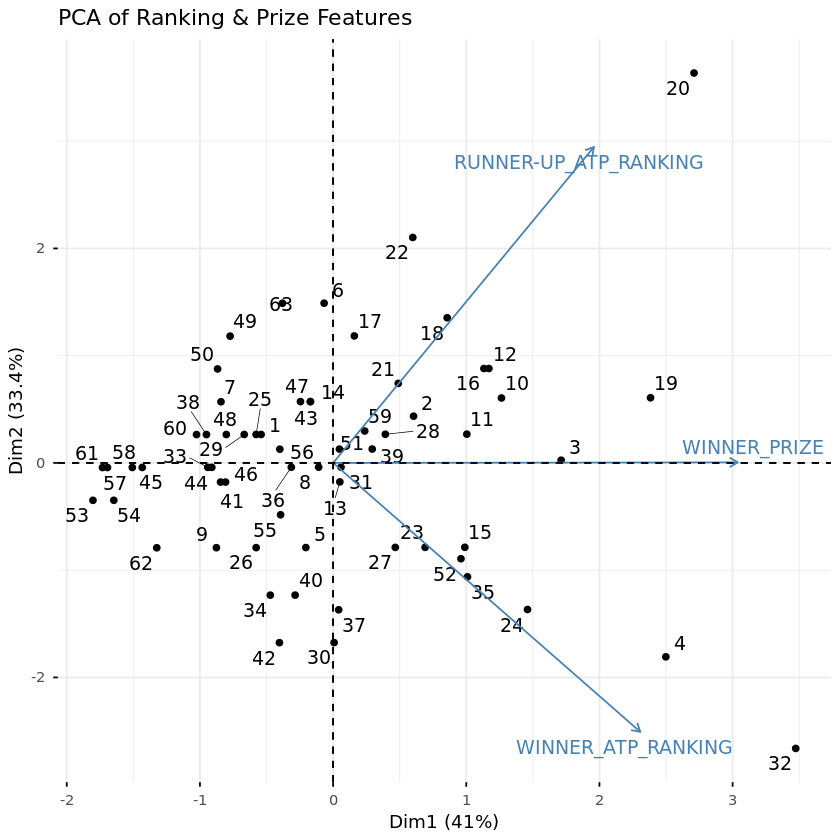

In [10]:
pca <- prcomp(clust_df, scale. = FALSE)
summary(pca)

fviz_pca_biplot(pca, repel = TRUE,
                title = "PCA of Ranking & Prize Features")

Grand Slam outcomes in the past 15 years seem to be pretty homogenous using these variables for clustering.
Prize money is not an insightful pattern because it is usually consistent for the tournament and has not changed much since 2007. Additionally, because this dataset is investigating Grand Slam tournaments only, it is more common for the best players to make the finals, which leads to homogeneity in the PCA plot. The nature of this data set is that the categorical variables seem to be the most interesting outcomes to compare.


**Question 4: Does the dominant hand of the tournament winner vary by tournament surface?**

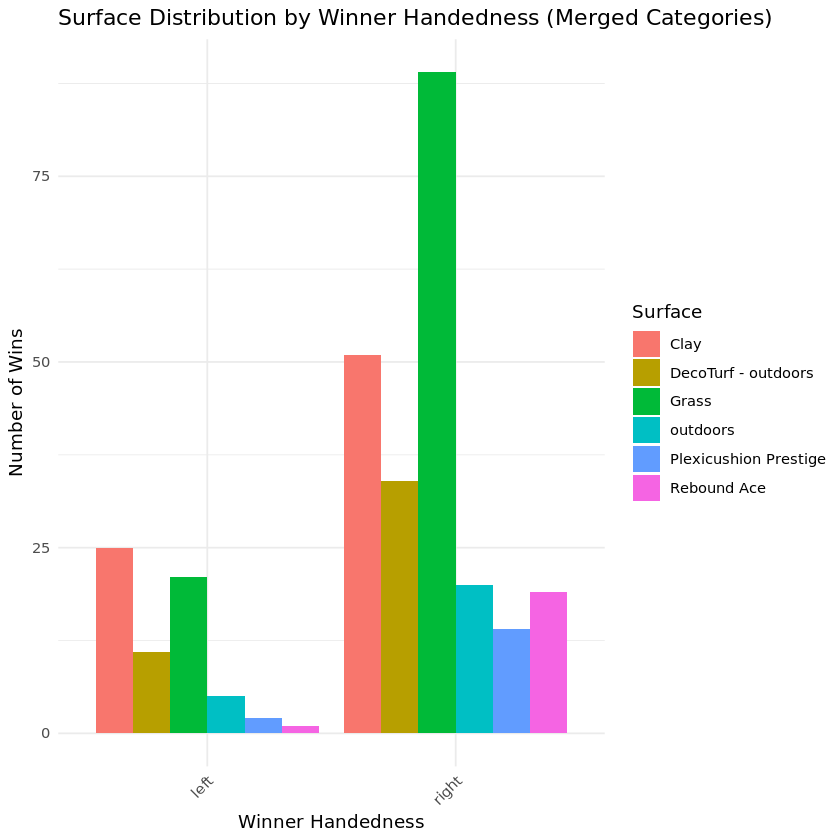

In [11]:
df <- df %>%
  mutate(
    SURFACE_MERGED = case_when(
      TOURNAMENT_SURFACE %in% c("Clay", "Clay - outdoors") ~ "Clay",
      TOURNAMENT_SURFACE %in% c("Grass", "Grass / Outdoor") ~ "Grass",
      TRUE ~ TOURNAMENT_SURFACE 
    )
  )

df %>%
  ggplot(aes(x = WINNER_LEFT_OR_RIGHT_HANDED, fill = SURFACE_MERGED)) +
  geom_bar(position = "dodge") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  ) +
  labs(
    title = "Surface Distribution by Winner Handedness (Merged Categories)",
    x = "Winner Handedness",
    y = "Number of Wins",
    fill = "Surface"
  )



This anlaysis shows that right handed players dominate all surfaces which makes sense as right handed players are more common than left handed players. However, left handed players show a disproportionate strength on clay courts. This could be because clay allows for more top spin which left handed players tend to use. This could very much be skewed by players like Rafael Nadal who is a left handed player and historically the best on clay courts as he trained in Spain where that is the dominant court surface. 

**Question 5: Do players from certain countries tend to win on specific surfaces?**

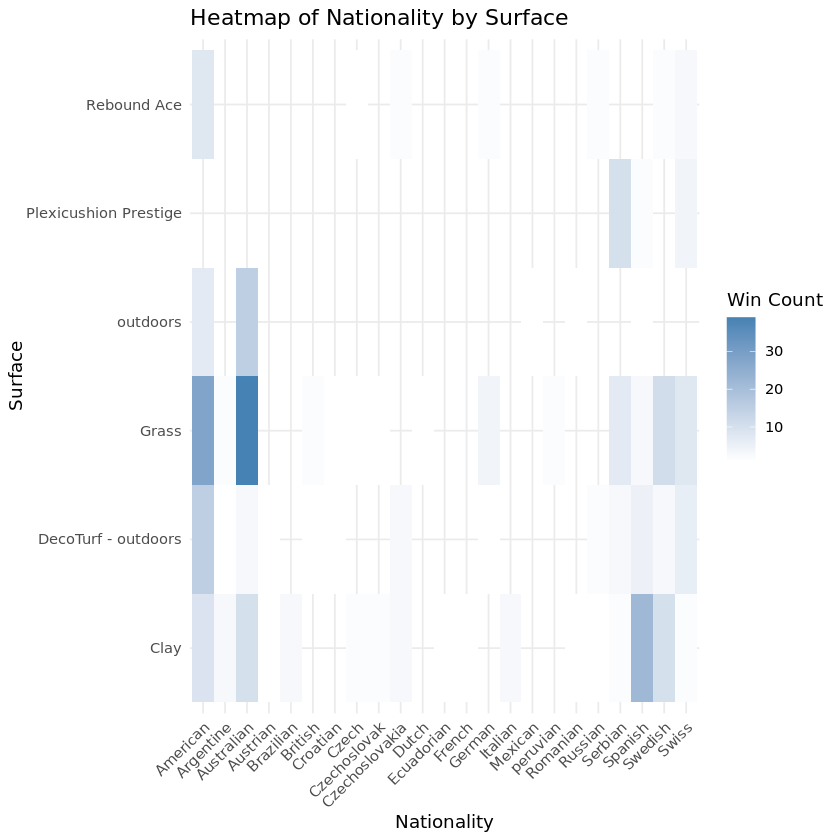

In [12]:
library(dplyr)
library(ggplot2)

df %>%
  count(WINNER_NATIONALITY, SURFACE_MERGED) %>%
  ggplot(aes(x = WINNER_NATIONALITY, y = SURFACE_MERGED, fill = n)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "steelblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(
    title = "Heatmap of Nationality by Surface",
    x = "Nationality",
    y = "Surface",
    fill = "Win Count"
  )


This heatmap shows nationality based patterns based on surface type for Grand Slams. This heat map clearly shows Spanish dominance on clay courts which makes sense considering the success of Rafael Nadal and Carlos Alcaraz in the past twenty years. There are alos many grass court wins by Swiss, British, and Serbian players, as well as the consistent American wins across all surfaces. This can be clearly traced back to instances of dominance by specific players like Rodger Federer, Novak Djokovic and Andy Murray. There does not seem to be a clear indication that players from the country of the specific slam will win on the court surface/win the tournament in thier own country. This seems to be the most prevalent in the United States for American players on hard courts. However, there seems to be clear court surface specialization based on nationality.